In [2]:
#8.1

#（1）
import numpy as np
import sympy as sym
x = sym.symbols('x')
y1 = sym.Function('y')
eq1 = sym.diff(y1(x),x)-2*y1(x)**2-1#定义方程
con = {y1(0):0}#定义初值条件
y1 = sym.dsolve(eq1,ics = con)
print(sym.sympify(y1))
#(2)
y2 = sym.Function('y')
eq2 = sym.diff(y2(x),x,3)-2*sym.diff(y2(x),x,2)+y2(x)
con2 = {y2(0):1,sym.diff(y2(x),x).subs(x,0):1,sym.diff(y2(x),x,2).subs(x,0):0}
y2 = sym.dsolve(eq2,ics = con2)
print(sym.sympify(y2))#求出来的解比较复杂

Eq(y(x), sqrt(2)*tan(sqrt(2)*x)/2)
Eq(y(x), 2*exp(x) + (-1/2 + sqrt(5)/10)*exp(x*(1 - sqrt(5))/2) + (-1/2 - sqrt(5)/10)*exp(x*(1 + sqrt(5))/2))


Eq(x(t), -sqrt(7)*exp(3*t/2)*sin(sqrt(7)*t/2)/7 + exp(3*t/2)*cos(sqrt(7)*t/2)) 
 Eq(y(t), 2*sqrt(7)*exp(3*t/2)*sin(sqrt(7)*t/2)/7)


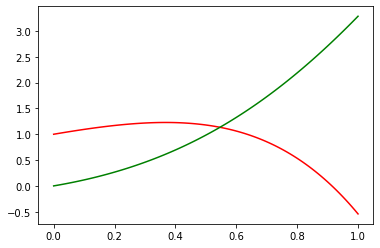

In [23]:
#8.2

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
t = sym.symbols('t')
x,y = sym.symbols('x,y',cls = sym.Function)
eq = [x(t).diff(t)-x(t)+2*y(t),y(t).diff(t)-x(t)-2*y(t)]
con = {x(0):1,y(0):0}
s = sym.dsolve(eq,ics=con)
print(s[0],'\n',s[1])
u = np.linspace(0,1,100)
xf = -np.sqrt(7)*np.exp(3.*u/2.)*np.sin(np.sqrt(7)*u/2.)/7. + np.exp(3.*u/2.)*np.cos(np.sqrt(7.)*u/2.)
yf = 2.*np.sqrt(7)*np.exp(3.*u/2.)*np.sin(np.sqrt(7)*u/2.)/7.
plt.plot(u,xf,'r')
plt.plot(u,yf,'g')
plt.show()#两个都是单调函数

C:\Users\goodboy\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


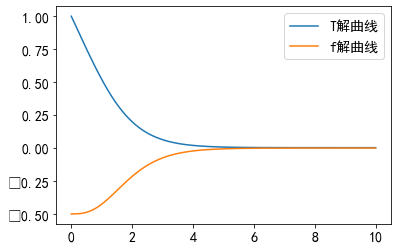

In [36]:
#8.3

from scipy.integrate import solve_ivp
def natural_convection(eta, y): # 将含有两个未知函数的高阶微分方程降阶，得到由2+3个一阶微分方程组成的方程组
  T1 = y[0] #T函数的0阶导，即T函数本身
  T2 = y[1]#T函数的1阶导
  f1 = y[2]#f函数的0阶导，即f函数本身
  f2 = y[3]#f函数的1阶导
  f3 = y[4]#f函数的2阶导
  return T2, -2.1*f1*T2, f2, f3, -3*f1*f3 + 2*(f2**2)-T1#其实最终还是化为最高阶导数的函数
  #返回的依次为1阶导，2高阶导。。。高阶导
eta = np.linspace(0, 10, 1000)#变量取值
eta_span = [0, 10]#取值范围
init = np.array([ 1, -0.5, 0, 0, 0.68])#题目给的初值条件
curve = solve_ivp(natural_convection, eta_span, init, t_eval=eta)
t = curve.t
data = curve.y
plt.rc('font',size =14)
plt.rc('font',family = 'SimHei')
plt.plot(t,data[0,:],label = 'T解曲线')
plt.plot(t,data[1,:],label = 'f解曲线')
plt.legend(loc ='best')
plt.show()

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1478
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
 

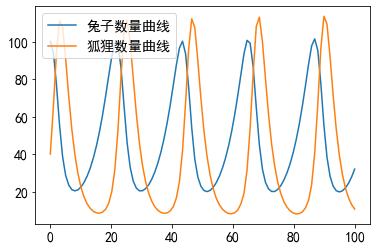

[50. 40.]
100个周期内兔子的最大值为：101.38854694863763,最小值为：19.776045816978574
100个周期内狐狸的最大值为：113.47672533950826,最小值为：8.054299676628421
兔子数量第一次达到最大值为的时间为：22,第一次达到最小值的时间为：8
狐狸数量第一次达到最大值为：4,第一次达到最小值时间为：16


'\n兔子与狐狸之间动态平衡\n可以尝试时间轴放大，以及放大初始种群数量,来看整体的变化情况\n'

In [286]:
#8.4

#出现一个疑问，先求解符号解还是数值解？
#先尝试解出x(t)和y(t)的符号解
'''
import sympy as sym
t = sym.symbols('t')
x1,x2 = sym.symbols('x,y',cls = sym.Function)
eq = [x1(t).diff(t)-0.2*x1(t)+0.005*x1(t)*x2(t),
      x2(t).diff(t)+0.5*x2(t)-0.01*x1(t)*x2(t)]
con = {x1(0):70,x2(0):40}
s = sym.dsolve(eq,ics = con)
print(s)
经过测试，sympy好像并不能解决这个问题（经过调试应该可以，但是我无法解决）
'''
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import numpy as np
def natural_convection(eta, y): # 将含有两个未知函数的高阶微分方程降阶，得到由2+3个一阶微分方程组成的方程组
  x1 = y[0] #x函数的0阶导，即x函数本身
  y1 = y[1]#y函数的0阶导，即y函数本身
  return 0.2*x1-0.005*x1*y1,-0.5*y1+0.01*x1*y1
  #返回的依次为1阶导，2高阶导。。。高阶导
t = np.linspace(0, 100,100)#变量取值
t_span = [0,500]#取值范围
init = np.array([100,40])#题目给的初值条件
curve = solve_ivp(natural_convection,t_span= t_span,y0= init, t_eval=t)
print(curve)
t = curve.t
data = curve.y
plt.rc('font',size =14)
plt.rc('font',family = 'SimHei')
plt.plot(t,data[0,:],label = '兔子数量曲线')
plt.plot(t,data[1,:],label = '狐狸数量曲线')
plt.legend(loc ='best')
plt.show()#可以看到，兔子与狐狸的数量在不断的动态平衡当中
def f(z):
#转换为标准的浮点数列表
    z1, z2 = z.tolist()
    return[0.2*z1-0.005*z1*z2,
           -0.5*z2+0.01*z1*z2]
result = fsolve(f, [100,100])
print(result)#(dx/dt=0,dy/dt=0，同时满足)初始平衡，兔子种群为50，狐狸种群为40(什么时间达到，还未知)
print('100个周期内兔子的最大值为：{},最小值为：{}'.format(data[0,:].max(),data[0,:].min()))
print('100个周期内狐狸的最大值为：{},最小值为：{}'.format(data[1,:].max(),data[1,:].min()))
#第一次最大值出现的
print('兔子数量第一次达到最大值为的时间为：{},第一次达到最小值的时间为：{}'.format(np.argmax(data[0,1:30])+2,np.argmin(data[0,:20])))
print('狐狸数量第一次达到最大值为：{},第一次达到最小值时间为：{}'.format(np.argmax(data[1,:20])+1,np.argmin(data[1,:20]+1)))
'''
兔子与狐狸之间动态平衡
可以尝试时间轴放大，以及放大初始种群数量,来看整体的变化情况
'''

[[ 9.99900000e+03  1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 9.99589880e+03  3.92584509e+00  1.10149741e+00  7.38569199e-02]
 [ 9.99219050e+03  7.23943264e+00  1.40786689e+00  1.62202452e-01]
 ...
 [-4.90732291e-14  2.17401783e-07  5.33130763e-06  1.00010000e+04]
 [-4.90732290e-14  2.02416768e-07  4.97830645e-06  1.00010000e+04]
 [-4.90732290e-14  1.88462527e-07  4.64859587e-06  1.00010000e+04]]


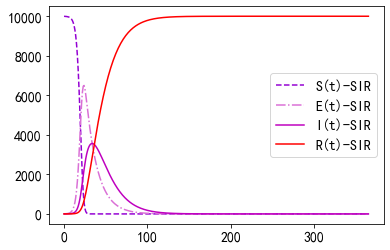

In [259]:
#8.5

'''
attentio：python解决ODEs问题，有两个函数，solve_ivp和odeint，但是两个函数然后输入y值得位置不同，错误使用则会报错
'''
'''
8.3.4用的是SIR模型，SIR模型的进一步演变即为SEIR模型
可以增加一种人群类型，即暴露者（潜伏者）类型（E类）
变化规律为：S-->E-->I-->R，数据相互之间不影响

β表示一个单位时间内感染者导致感染散播的平均传播人数
N为总人数
设定该病的平均潜伏周期为C天，平均传染周期为D天
dS/dt = -(β*I(t))*(S(t)/N)       (易感人数的变化)
dE/dt = β*I(t)*S(t)/N-1/C*E(t)   (潜伏人数变化率 = 新增加潜伏感染人数-潜伏转确诊人数)
dI/dt = 1/C*E(t)-1/D*I(t)        (感染人数的变化 = 潜伏转确诊人数-治愈人数)
dR/dt = 1/D*I(t)                 (康复者人数变化)
N = S+E+I+R                      (总的人数限定)

（1）β/N 可以用λ替代，λ表示平均传染接触率
（2）1/C 可以用a来替代，a表示平均发病比例
（3）1/D 可以用μ来替代，μ表示平均治愈比例
化简为：
dS/dt = -λSI     S(0) = s0
dE/dt = λSI-aE   E(0) = e0
dI/dt = aE-μI    I(0) = i0
dR/dt = μI
'''
#查阅相关文献发现，改模型无法求解析解，只能求数值解
#使用scipy中的odeint方法来解决
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
N = 10000
S_0 = 10000-1  #使用正规化人口数据,初始存在一个潜伏者，则剩下来的都是易感者
E_0 = 1   #初始存在1一个潜伏者
I_0 = 1     #初始存在感染者
R_0 = 0       #初值不存在康复者
#使用365天作为一个周期，单个体平均传播人数为3，潜伏周期为14天，传染周期为14天
t_max = 365
lamda = 3/10000 #λ平均传染接触率
aerf = 1/14#a平均每天发病比例
mu = 1/14 #μ平均每天治愈比例
def SIER(y,t):
    s = y[0]
    e = y[1]
    i = y[2]
    r = y[3]
    return  -lamda*s*i, lamda*s*i-aerf*e,aerf*e-mu*i,mu*i
t = np.linspace(0,365,t_max+1)#获得101个数据点
initial = (S_0,E_0,I_0,R_0)
ySEIR = odeint(SIER,initial,t)
print(ySEIR)
plt.plot(t, ySEIR[:,0], '--', color='darkviolet', label='S(t)-SIR')
plt.plot(t, ySEIR[:,1], '-.', color='orchid', label='E(t)-SIR')
plt.plot(t, ySEIR[:,2], '-', color='m', label='I(t)-SIR')
plt.plot(t, ySEIR[:,3],  color='r', label='R(t)-SIR')
plt.legend(loc = 'best')
plt.show()

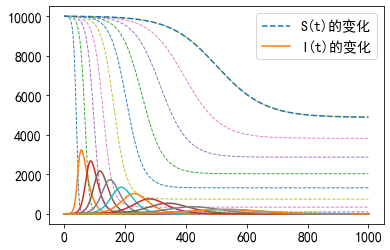

In [258]:
#续8.5

'''
在上述条件不变的情况下，验证保持社交距离对于防控疫情的效果
'''
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
N = 10000
S_0 = 9999  #使用正规化人口数据,初始存在一个潜伏者，则剩下来的都是易感者
E_0 = 1    #初始存在1一个潜伏者
I_0 = 1     #初始存在感染者
R_0 = 0       #初值不存在康复者
#使用365天作为一个周期，单个体平均传播人数为1，潜伏周期为14天，传染周期为14天
t_max = 1000
lamda = 1/10000 #λ平均传染接触率
aerf = 1/14#a平均每天发病比例
mu = 1/14 #μ平均每天治愈比例
for dis in range(1,11):
    soc_dis = 1/dis#0-1之间的数用于控制易感者的人数
    def SIER(y,t):
        s = y[0]
        e = y[1]
        i = y[2]
        r = y[3]
        return  -soc_dis*lamda*s*i, soc_dis*lamda*s*i-aerf*e,aerf*e-mu*i,mu*i
    t = np.linspace(0,t_max,int(t_max)+1)#获得101个数据点
    initial = (S_0,E_0,I_0,R_0)
    ySEIR = odeint(SIER,initial,t)
    plt.plot(t, ySEIR[:,0], '--',linewidth = 0.9)
    plt.plot(t, ySEIR[:,2], '-')
    if dis == 10:
        plt.plot(t, ySEIR[:,0],'--',label = 'S(t)的变化')
        plt.plot(t, ySEIR[:,2], '-',label = 'I(t)的变化')
plt.legend(loc = 'best')
plt.show()
'''
可见随着社交距离的扩大，易感人群逐渐稳定并保持较少人群感染。
感染人群的波峰到来时间逐渐延后，并且波峰值更小，感染的扩散风险更小
'''

线性拟合表达式：  
1.177 x + 4.846
1.1768383333333334
[14.26029778 14.84871694 15.43713611 16.02555528 16.61397444 17.20239361]


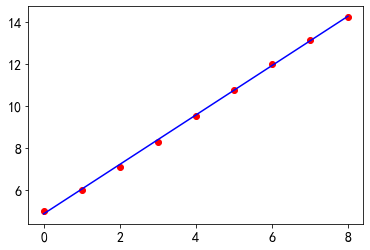

In [262]:
#8.6

#看数据应该是一个单调增模型
import numpy as np
year = np.arange(0, 9, 1)
num = [5, 5.9945, 7.0932, 8.2744, 9.5073, 10.7555, 11.9804, 13.1465, 14.2247]
fit = np.polyfit(year, num, 1)
print("线性拟合表达式：", np.poly1d(fit))
num_fit = np.polyval(fit, year)
plt.plot(year, num, 'ro', label='原始数据')
plt.plot(year, num_fit, 'b-',label='拟合曲线')
year_later = np.arange(8, 11, 0.5)
num_fit_curve = fit[0] * year_later + fit[1]#用一次函数拟合数据，fit[0]就是斜率，fit[1]就是常数项
print(num_fit_curve)

二次函数拟合的误差 [[ 2.51650344e-05 -2.01320282e-04  2.34873658e-04]
 [-2.01320282e-04  1.73974272e-03 -2.39571096e-03]
 [ 2.34873658e-04 -2.39571096e-03  5.12024340e-03]]
一次函数拟合的误差 [[ 0.00014201 -0.00056806]
 [-0.00056806  0.003219  ]]
[0.00653193 1.12458292 4.90655576]
[1.17683833 4.84559111]


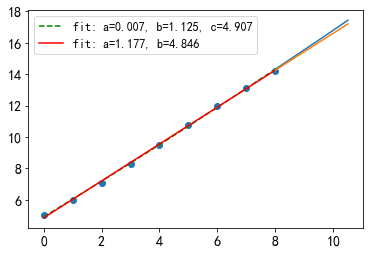

In [280]:
#8.6

#先查看数据分布，再确定数据的拟合曲线
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
year = np.arange(0, 9, 1)
num = [5, 5.9945, 7.0932, 8.2744, 9.5073, 10.7555, 11.9804, 13.1465, 14.2247]
plt.scatter(year,num)#看图像貌似是一条曲线，但是用一次函数，还是二次函数可以都尝试一下
def func1(x, a, b, c):
    return a*x**2 +b*x+c
def func2(x,a,b):
    return a*x+b
popt1, pcov1 = curve_fit(func1, year, num) #拟合二次函数
plt.plot(year, func1(year, *popt1), 'g--',
              label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1))#可以看到二次函数拟合的效果还是不错的
print('二次函数拟合的误差',pcov1)#二次函数误差貌似有点高
popt2, pcov2 = curve_fit(func2, year, num)#拟合一次函数
plt.plot(year, func2(year, *popt2), 'r-',
              label='fit: a=%5.3f, b=%5.3f' % tuple(popt2))
print('一次函数拟合的误差',pcov2)#一次函数的误差较小
plt.legend(loc='best',fontsize = 12)
print(popt1)
print(popt2)
year_later = np.arange(8, 11, 0.5)
num_fit_curve1 = popt1[0] * year_later**2 + popt1[1]*year_later + popt1[2]#二次曲线预测
num_fit_curve2 = popt2[0] * year_later + popt2[1]#一次曲线预测
plt.plot(year_later,num_fit_curve1)
plt.plot(year_later,num_fit_curve2)#从曲线分析，貌似一次曲线更符合需求

In [318]:
#8.7

#利用线性最小二乘方法，估算整体的最小值
import numpy as np
t0 = np.array([0,1,2,3,4,5,6,8,10,12,14,16,18])
x0 = np.array([60,63,64,63,61,58,53,44,39,38,41,46,53])
y0= np.array([30,34,38,44,50,55,58,56,47,38,30,27,26])
dt = np.diff(t0)#输出t方向的离散差值
dx = np.diff(x0)#输出x轴方向的离散差值
dy = np.diff(y0)#输出y轴方向的离散差值
temp = x0[:-1]*y0[:-1]#x与y的乘积
mat1 = np.vstack([x0[:-1],-temp,np.zeros((2,12))]).T#按照列方向堆叠
print(mat1)
mat2 = np.vstack([np.zeros((2,12)),-y0[:-1],temp]).T#按照列方向堆叠
print(mat2)
mat = np.vstack([mat1,mat2])#构造线性方程组的系数矩阵
print(mat)#堆叠形成左边的矩阵
b = np.hstack([dx/dt,dy/dt])#按照行方向堆叠，构造线性方程组的常数项列
print(b)
cs = (np.linalg.pinv(mat))@b
''''
利用pinv函数求解mat的伪逆矩阵，
奇异矩阵和非方阵没有逆矩阵，但是可以有伪逆矩阵
Ax=b 如果A不是可逆举证，则x的最小化解为：A(L)*b
'''
print('参数a,b,c,d为：',np.round(cs,5))#给cs保留5位小数


[[   60. -1800.     0.     0.]
 [   63. -2142.     0.     0.]
 [   64. -2432.     0.     0.]
 [   63. -2772.     0.     0.]
 [   61. -3050.     0.     0.]
 [   58. -3190.     0.     0.]
 [   53. -3074.     0.     0.]
 [   44. -2464.     0.     0.]
 [   39. -1833.     0.     0.]
 [   38. -1444.     0.     0.]
 [   41. -1230.     0.     0.]
 [   46. -1242.     0.     0.]]
[[   0.    0.  -30. 1800.]
 [   0.    0.  -34. 2142.]
 [   0.    0.  -38. 2432.]
 [   0.    0.  -44. 2772.]
 [   0.    0.  -50. 3050.]
 [   0.    0.  -55. 3190.]
 [   0.    0.  -58. 3074.]
 [   0.    0.  -56. 2464.]
 [   0.    0.  -47. 1833.]
 [   0.    0.  -38. 1444.]
 [   0.    0.  -30. 1230.]
 [   0.    0.  -27. 1242.]]
[[   60. -1800.     0.     0.]
 [   63. -2142.     0.     0.]
 [   64. -2432.     0.     0.]
 [   63. -2772.     0.     0.]
 [   61. -3050.     0.     0.]
 [   58. -3190.     0.     0.]
 [   53. -3074.     0.     0.]
 [   44. -2464.     0.     0.]
 [   39. -1833.     0.     0.]
 [   38. -1444.     0. 